In [1]:
import pandas as pd
import numpy as np
import os
from os.path import splitext, basename
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Import dataframe from CSV stitched together from different MagmaSat outputs. 
- I have tested various solubility models on andesitic-dacitic experiments, and shown that MagmaSat is the only suitably calibrated model (Papale is far too sensitive to melt redox - and at high pressures, greatly overestimates saturation pressures). I can send these along too if its of interest. All cascade saturation pressures presented below are calculated in MagmaSat.  


In [3]:
# Reads in the compiled dataset
dfm=pd.read_csv('MeltInclusions_Jan2021_Compiled.csv')

# Saturation pressures versus latitude
- The first subplot shows measured H2O and CO2 concentrations in the melt inclusion glass phase. Where appropriate, these concentrations are adjusted for the effects of PEC using the correction factor suggested by authors. Data is subdivided into SiO2<60 (mafic) and SiO2>60 (felsic)
- The second subplot shows melt inclusion data where CO2 has been measured in the vapour phase using Raman Spectroscopy, and this has been added to the glass CO2 contents to get total CO2 (green). For the Garibaldi VB - the raman correction is anomalously large as they did not calibrate their particular instrument. The Lassen data is from Aster, and is probably 10\% too high as they did their study before virginia Tech really nailed down low pressure calibrations. This plot also shows inclusions where CO2 has been reconstructed theoretically (in blue), and then this CO2 is added to the glass CO2 content. In both cases, total CO2 contents are then corrected for PEC.
- The third subplot compares measured CO2 in the glass with these raman and theoretical reconstructions. 
- Theoretical + raman reconstructions almost double saturation pressures

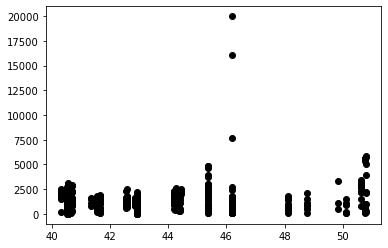

In [11]:
plt.plot(dfm['latitude'],dfm["satp_meash2omeasco2"], 'ok')

In [23]:
dfm['volcano'].unique()

array(['Lassen', 'Mazama', 'Mount St. Helens', 'CentralOregonMafics',
       'Mt Hood', 'Shasta', nan, 'GlacierPeak', 'MountBaker',
       'GarivaldiLake', 'MountCayley', 'MountMeager', 'SalalGlacier',
       'BridgeRiver'], dtype=object)

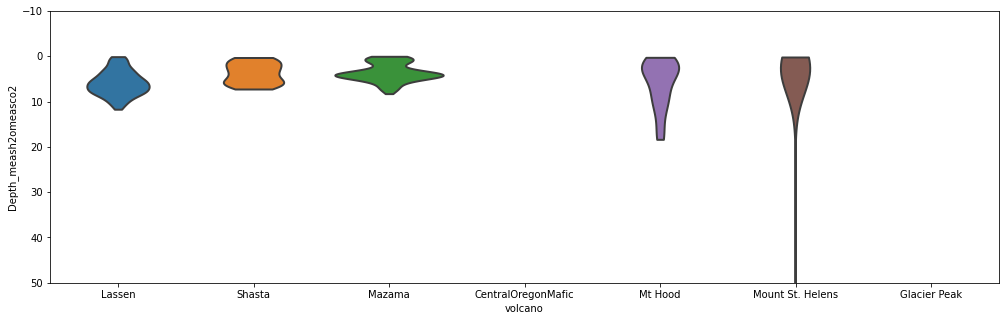

In [26]:
fig, (ax1) = plt.subplots(1, 1, figsize=(17,5), sharey=True)
dfm['Depth_meash2omeasco2']=0.1*dfm["satp_meash2omeasco2"]/(9.8*2.7)
import seaborn as sns
volc_order=["Lassen", "Shasta", "Mazama", "CentralOregonMafic",
            "Mt Hood", "Mount St. Helens", "Glacier Peak"]
sns.violinplot(x="volcano", y="Depth_meash2omeasco2", cut=0, inner=None,
            data=dfm, split=True, ax=ax1, order=volc_order, alpha=0.6, linewidth=2)
ax1.set_ylim([-10, 50])
ax1.invert_yaxis()

In [4]:
dfm

,Unnamed: 0,Unnamed: 1,reference,volcano,sample,host_mineral,mi_number,latitude,longitude,temperature_authors,...,satp_meash2oramanco2,xh2o_fl_meash2oramanco2,satp_meash2otheorco2,xh2o_fl_meash2otheorco2,satp_diffh2omeasco2,xh2o_fl_diffh2omeasco2,satp_diffh2otheorco2,xh2o_fl_diffh2otheorco2,satp_meash2onoco2,xh2o_fl_meash2onoco2
0,Aster2016,0,Aster_2016,Lassen,BORG,NaN,5.2,40.654342,-121.224742,NaN,...,2910.0,0.235034,5540.0,0.149917,NaN,NaN,NaN,NaN,NaN,NaN
1,Aster2016,1,Aster_2016,Lassen,BORG,NaN,19.2,40.654342,-121.224742,NaN,...,2460.0,0.195407,2680.0,0.182894,NaN,NaN,NaN,NaN,NaN,NaN
2,Aster2016,2,Aster_2016,Lassen,BORG,NaN,19.5,40.654342,-121.224742,NaN,...,2770.0,0.146233,2240.0,0.172047,NaN,NaN,NaN,NaN,NaN,NaN
3,Aster2016,3,Aster_2016,Lassen,BORG,NaN,19.8,40.654342,-121.224742,NaN,...,3390.0,0.134800,3630.0,0.128002,NaN,NaN,NaN,NaN,NaN,NaN
4,Aster2016,4,Aster_2016,Lassen,BORG,NaN,23.1,40.654342,-121.224742,NaN,...,3240.0,0.099821,3170.0,0.101441,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,Wright2012,122,Wright et al. 2012,Mazama,climatic rhyodacite,Plagioclase,1998plag14-2.1,42.916500,-122.084500,895.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
728,Wright2012,123,Wright et al. 2012,Mazama,climatic rhyodacite,Plagioclase,1998-plag14-3.1,42.916500,-122.084500,895.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
729,Wright2012,124,Wright et al. 2012,Mazama,climatic rhyodacite,Plagioclase,1998-plag14-4.1,42.916500,-122.084500,895.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
730,Wright2012,125,Wright et al. 2012,Mazama,climatic rhyodacite,Plagioclase,1998plag15-1.1,42.916500,-122.084500,895.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


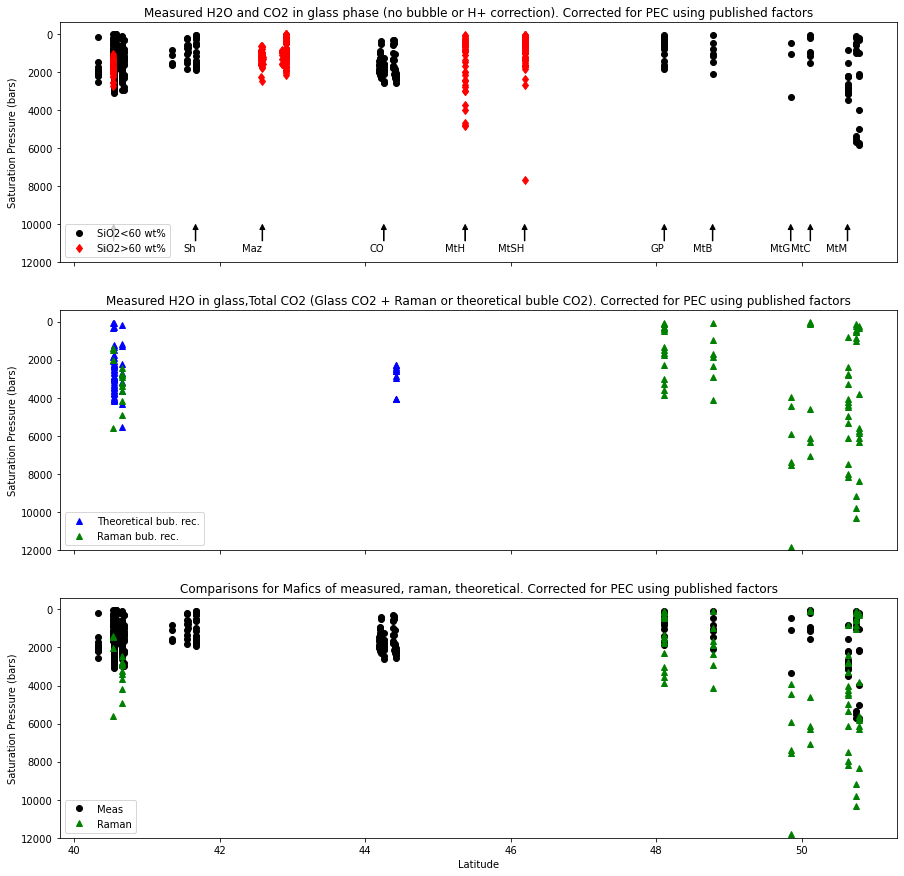

In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(15,15), sharey=True, sharex=True) # adjust dimensions of figure here
ax1.set_title('Measured H2O and CO2 in glass phase (no bubble or H+ correction). Corrected for PEC using published factors')
ax1.plot(dfm.loc[dfm['sio2_pec_wt']<60, 'latitude'], dfm.loc[dfm['sio2_pec_wt']<60, 'satp_meash2omeasco2'], 'ok', label='SiO2<60 wt%')
ax1.plot(dfm.loc[dfm['sio2_raw_wt']>60, 'latitude'], dfm.loc[dfm['sio2_raw_wt']>60, 'satp_meash2omeasco2'], 'dr', label='SiO2>60 wt%')

ax2.set_title('Measured H2O in glass,Total CO2 (Glass CO2 + Raman or theoretical buble CO2). Corrected for PEC using published factors')


ax2.plot(dfm.loc[dfm['sio2_pec_wt']<60, 'latitude'], dfm.loc[dfm['sio2_pec_wt']<60, 'satp_meash2otheorco2'], '^b', label='Theoretical bub. rec.')

ax2.plot(dfm.loc[dfm['sio2_pec_wt']<60, 'latitude'], dfm.loc[dfm['sio2_pec_wt']<60, 'satp_meash2oramanco2'], '^g', label='Raman bub. rec.')
ax3.set_title('Comparisons for Mafics of measured, raman, theoretical. Corrected for PEC using published factors')
ax3.plot(dfm.loc[dfm['sio2_pec_wt']<60, 'latitude'], dfm.loc[dfm['sio2_pec_wt']<60, 'satp_meash2omeasco2'], 'ok', label='Meas')
#ax3.plot(dfm.loc[dfm['sio2_pec_wt']<60, 'latitude'], dfm.loc[dfm['sio2_pec_wt']<60, 'satp_meash2otheorco2'], '^b', label='Theor')
ax3.plot(dfm.loc[dfm['sio2_pec_wt']<60, 'latitude'], dfm.loc[dfm['sio2_pec_wt']<60, 'satp_meash2oramanco2'], '^g', label='Raman')
ax3.legend()


ax1.annotate('Sh', xy=(41.666, 10000),   xycoords='data',
            xytext=(41.666, 11000), textcoords='data', 
            arrowprops=dict(facecolor='black', width=0.5, headlength=5,headwidth=5, shrink=0.02),
            horizontalalignment='right', verticalalignment='top'
            )
ax1.annotate('La', xy=(40.540139, 10000),  xycoords='data',
            xytext=(40.540139, 11000), textcoords='data', 
            arrowprops=dict(facecolor='black', width=0.5, headlength=5,headwidth=5, shrink=0.02),
            horizontalalignment='right', verticalalignment='top'
            )
ax1.annotate('Maz', xy=(42.5846, 10000),  xycoords='data',
            xytext=(42.5846, 11000), textcoords='data', 
            arrowprops=dict(facecolor='black', width=0.5, headlength=5,headwidth=5, shrink=0.02),
            horizontalalignment='right', verticalalignment='top'
            )
ax1.annotate('CO', xy=(44.25471667, 10000),  xycoords='data',
            xytext=(44.25471667, 11000), textcoords='data', 
            arrowprops=dict(facecolor='black', width=0.5, headlength=5,headwidth=5, shrink=0.02),
            horizontalalignment='right', verticalalignment='top'
            )
ax1.annotate('MtH', xy=(45.3736, 10000),  xycoords='data',
            xytext=(45.3736, 11000), textcoords='data', 
            arrowprops=dict(facecolor='black', width=0.5, headlength=5,headwidth=5, shrink=0.02),
            horizontalalignment='right', verticalalignment='top')
ax1.annotate('MtSH', xy=(46.1914, 10000),  xycoords='data',
            xytext=(46.1914, 11000), textcoords='data', 
            arrowprops=dict(facecolor='black', width=0.5, headlength=5,headwidth=5, shrink=0.02),
            horizontalalignment='right', verticalalignment='top')
ax1.annotate('GP', xy=(48.1119, 10000),  xycoords='data',
            xytext=(48.1119, 11000), textcoords='data', 
            arrowprops=dict(facecolor='black', width=0.5, headlength=5,headwidth=5, shrink=0.02),
            horizontalalignment='right', verticalalignment='top'
            )
ax1.annotate('MtB', xy=(48.7767, 10000),  xycoords='data',
            xytext=(48.7767, 11000), textcoords='data', 
            arrowprops=dict(facecolor='black', width=0.5, headlength=5,headwidth=5, shrink=0.02),
            horizontalalignment='right', verticalalignment='top'
            )
ax1.annotate('MtG', xy=(49.8507, 10000),  xycoords='data',
            xytext=(49.8507, 11000), textcoords='data', 
            arrowprops=dict(facecolor='black', width=0.5, headlength=5,headwidth=5, shrink=0.02),
            horizontalalignment='right', verticalalignment='top'
            )
ax1.annotate('MtC', xy=(50.1203, 10000),  xycoords='data',
            xytext=(50.1203, 11000), textcoords='data', 
            arrowprops=dict(facecolor='black', width=0.5, headlength=5,headwidth=5, shrink=0.02),
            horizontalalignment='right', verticalalignment='top'
            )
ax1.annotate('MtM', xy=(50.6317, 10000),  xycoords='data', 
            xytext=(50.6317, 11000), textcoords='data', 
            arrowprops=dict(facecolor='black', width=0.5, headlength=5,headwidth=5, shrink=0.02),
            horizontalalignment='right', verticalalignment='top'
            )
49.8507
# Second coordinate is end of arrow, 1st  cord is where the arrow head is
ax1.invert_yaxis()
ax2.invert_yaxis()
ax3.invert_yaxis()
ax3.set_xlabel('Latitude')
ax1.set_ylabel('Saturation Pressure (bars)')
ax2.set_ylabel('Saturation Pressure (bars)')
ax3.set_ylabel('Saturation Pressure (bars)')

ax1.set_ylim([12000, -600])
ax1.legend()
ax2.legend()
ax3.legend()
fig.savefig('MeltInclusions.png', transparent=True)


# Trends in H$_2$O vs. latitude and as a function of melt composition. 

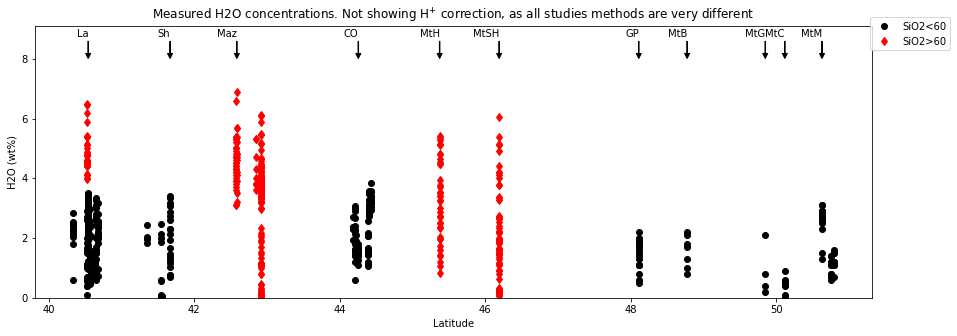

In [4]:
fig, (ax1) = plt.subplots(1,1, figsize=(15,5), sharey=True, sharex=True) # adjust dimensions of figure here
ax1.set_title('Measured H2O concentrations. Not showing H$^{+}$ correction, as all studies methods are very different')
ax1.plot(dfm.loc[dfm['sio2_pec_wt']<60, 'latitude'], dfm.loc[dfm['sio2_pec_wt']<60, 'h2o_pec_wt'], 'ok', label='SiO2<60')
ax1.plot(dfm.loc[dfm['sio2_raw_wt']>60, 'latitude'], dfm.loc[dfm['sio2_raw_wt']>60, 'h2o_raw_wt'], 'dr', label='SiO2>60')

arrow=8
textpos=9


ax1.annotate('Sh', xy=(41.666, arrow),   xycoords='data',
            xytext=(41.666, textpos), textcoords='data', 
            arrowprops=dict(facecolor='black', width=0.5, headlength=5,headwidth=5, shrink=0.02),
            horizontalalignment='right', verticalalignment='top'
            )
ax1.annotate('La', xy=(40.540139, arrow),  xycoords='data',
            xytext=(40.540139, textpos), textcoords='data', 
            arrowprops=dict(facecolor='black', width=0.5, headlength=5,headwidth=5, shrink=0.02),
            horizontalalignment='right', verticalalignment='top'
            )
ax1.annotate('Maz', xy=(42.5846, arrow),  xycoords='data',
            xytext=(42.5846, textpos), textcoords='data', 
            arrowprops=dict(facecolor='black', width=0.5, headlength=5,headwidth=5, shrink=0.02),
            horizontalalignment='right', verticalalignment='top'
            )
ax1.annotate('CO', xy=(44.25471667, arrow),  xycoords='data',
            xytext=(44.25471667, textpos), textcoords='data', 
            arrowprops=dict(facecolor='black', width=0.5, headlength=5,headwidth=5, shrink=0.02),
            horizontalalignment='right', verticalalignment='top'
            )
ax1.annotate('MtH', xy=(45.3736, arrow),  xycoords='data',
            xytext=(45.3736, textpos), textcoords='data', 
            arrowprops=dict(facecolor='black', width=0.5, headlength=5,headwidth=5, shrink=0.02),
            horizontalalignment='right', verticalalignment='top')
ax1.annotate('MtSH', xy=(46.1914, arrow),  xycoords='data',
            xytext=(46.1914, textpos), textcoords='data', 
            arrowprops=dict(facecolor='black', width=0.5, headlength=5,headwidth=5, shrink=0.02),
            horizontalalignment='right', verticalalignment='top')
ax1.annotate('GP', xy=(48.1119, arrow),  xycoords='data',
            xytext=(48.1119, textpos), textcoords='data', 
            arrowprops=dict(facecolor='black', width=0.5, headlength=5,headwidth=5, shrink=0.02),
            horizontalalignment='right', verticalalignment='top'
            )
ax1.annotate('MtB', xy=(48.7767, arrow),  xycoords='data',
            xytext=(48.7767, textpos), textcoords='data', 
            arrowprops=dict(facecolor='black', width=0.5, headlength=5,headwidth=5, shrink=0.02),
            horizontalalignment='right', verticalalignment='top'
            )
ax1.annotate('MtG', xy=(49.8507, arrow),  xycoords='data',
            xytext=(49.8507, textpos), textcoords='data', 
            arrowprops=dict(facecolor='black', width=0.5, headlength=5,headwidth=5, shrink=0.02),
            horizontalalignment='right', verticalalignment='top'
            )
ax1.annotate('MtC', xy=(50.1203, arrow),  xycoords='data',
            xytext=(50.1203, textpos), textcoords='data', 
            arrowprops=dict(facecolor='black', width=0.5, headlength=5,headwidth=5, shrink=0.02),
            horizontalalignment='right', verticalalignment='top'
            )
ax1.annotate('MtM', xy=(50.6317, arrow),  xycoords='data', 
            xytext=(50.6317, textpos), textcoords='data', 
            arrowprops=dict(facecolor='black', width=0.5, headlength=5,headwidth=5, shrink=0.02),
            horizontalalignment='right', verticalalignment='top'
            )
49.8507
# Second coordinate is end of arrow, 1st  cord is where the arrow head is

ax1.set_xlabel('Latitude')
ax1.set_ylabel('H2O (wt%)')
ax1.set_ylim([0, 9.1])

ax1.legend(bbox_to_anchor=(1.1, 1.05))

## CO$_2$ Concentrations vs. Latitude and as a function of melt composition

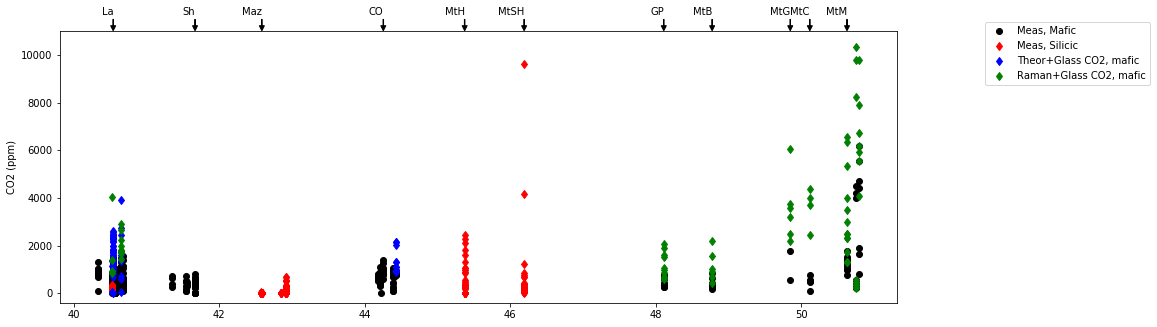

In [5]:
fig, (ax1) = plt.subplots(1,1, figsize=(15,5), sharey=True, sharex=True) # adjust dimensions of figure here

ax1.plot(dfm.loc[dfm['sio2_pec_wt']<60, 'latitude'], dfm.loc[dfm['sio2_pec_wt']<60, 'co2_glass_pec_ppm'], 'ok', label='Meas, Mafic')
ax1.plot(dfm.loc[dfm['sio2_raw_wt']>60, 'latitude'], dfm.loc[dfm['sio2_raw_wt']>60, 'co2_glass_raw_ppm'], 'dr', label='Meas, Silicic')
ax1.plot(dfm.loc[dfm['sio2_pec_wt']<60, 'latitude'], dfm.loc[dfm['sio2_pec_wt']<60, 'co2_totaltheor_pec_ppm'], 'db', label='Theor+Glass CO2, mafic')
ax1.plot(dfm.loc[dfm['sio2_pec_wt']<60, 'latitude'], dfm.loc[dfm['sio2_pec_wt']<60, 'co2_totalraman_pec_ppm'], 'dg', label='Raman+Glass CO2, mafic')

arrow=11000
textpos=arrow+1000


ax1.annotate('Sh', xy=(41.666, arrow),   xycoords='data',
            xytext=(41.666, textpos), textcoords='data', 
            arrowprops=dict(facecolor='black', width=0.5, headlength=5,headwidth=5, shrink=0.02),
            horizontalalignment='right', verticalalignment='top'
            )
ax1.annotate('La', xy=(40.540139, arrow),  xycoords='data',
            xytext=(40.540139, textpos), textcoords='data', 
            arrowprops=dict(facecolor='black', width=0.5, headlength=5,headwidth=5, shrink=0.02),
            horizontalalignment='right', verticalalignment='top'
            )
ax1.annotate('Maz', xy=(42.5846, arrow),  xycoords='data',
            xytext=(42.5846, textpos), textcoords='data', 
            arrowprops=dict(facecolor='black', width=0.5, headlength=5,headwidth=5, shrink=0.02),
            horizontalalignment='right', verticalalignment='top'
            )
ax1.annotate('CO', xy=(44.25471667, arrow),  xycoords='data',
            xytext=(44.25471667, textpos), textcoords='data', 
            arrowprops=dict(facecolor='black', width=0.5, headlength=5,headwidth=5, shrink=0.02),
            horizontalalignment='right', verticalalignment='top'
            )
ax1.annotate('MtH', xy=(45.3736, arrow),  xycoords='data',
            xytext=(45.3736, textpos), textcoords='data', 
            arrowprops=dict(facecolor='black', width=0.5, headlength=5,headwidth=5, shrink=0.02),
            horizontalalignment='right', verticalalignment='top')
ax1.annotate('MtSH', xy=(46.1914, arrow),  xycoords='data',
            xytext=(46.1914, textpos), textcoords='data', 
            arrowprops=dict(facecolor='black', width=0.5, headlength=5,headwidth=5, shrink=0.02),
            horizontalalignment='right', verticalalignment='top')
ax1.annotate('GP', xy=(48.1119, arrow),  xycoords='data',
            xytext=(48.1119, textpos), textcoords='data', 
            arrowprops=dict(facecolor='black', width=0.5, headlength=5,headwidth=5, shrink=0.02),
            horizontalalignment='right', verticalalignment='top'
            )
ax1.annotate('MtB', xy=(48.7767, arrow),  xycoords='data',
            xytext=(48.7767, textpos), textcoords='data', 
            arrowprops=dict(facecolor='black', width=0.5, headlength=5,headwidth=5, shrink=0.02),
            horizontalalignment='right', verticalalignment='top'
            )
ax1.annotate('MtG', xy=(49.8507, arrow),  xycoords='data',
            xytext=(49.8507, textpos), textcoords='data', 
            arrowprops=dict(facecolor='black', width=0.5, headlength=5,headwidth=5, shrink=0.02),
            horizontalalignment='right', verticalalignment='top'
            )
ax1.annotate('MtC', xy=(50.1203, arrow),  xycoords='data',
            xytext=(50.1203, textpos), textcoords='data', 
            arrowprops=dict(facecolor='black', width=0.5, headlength=5,headwidth=5, shrink=0.02),
            horizontalalignment='right', verticalalignment='top'
            )
ax1.annotate('MtM', xy=(50.6317, arrow),  xycoords='data', 
            xytext=(50.6317, textpos), textcoords='data', 
            arrowprops=dict(facecolor='black', width=0.5, headlength=5,headwidth=5, shrink=0.02),
            horizontalalignment='right', verticalalignment='top'
            )

# Second coordinate is end of arrow, 1st  cord is where the arrow head is

ax3.set_xlabel('Latitude')
ax1.set_ylabel('CO2 (ppm)')
ax1.set_ylim([-400, 11000])
ax1.legend(bbox_to_anchor=(1.1, 1.05))

## Same plot, but cuttting off the very high measurements (likely anomalous)

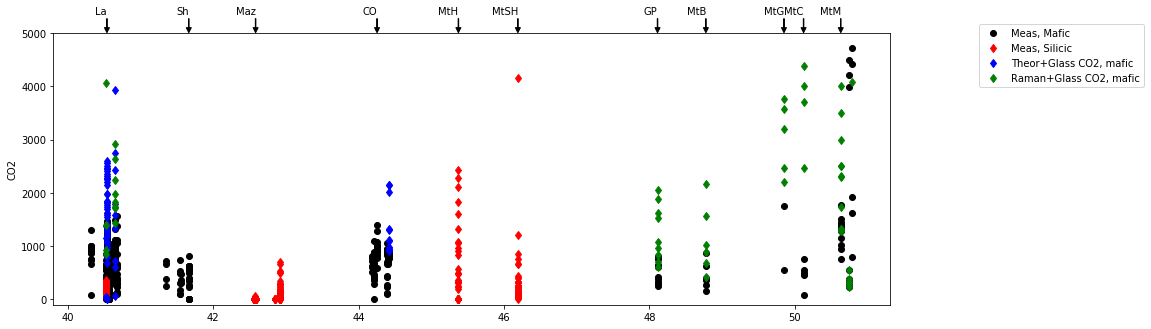

In [6]:
fig, (ax1) = plt.subplots(1,1, figsize=(15,5), sharey=True, sharex=True) # adjust dimensions of figure here

ax1.plot(dfm.loc[dfm['sio2_pec_wt']<60, 'latitude'], dfm.loc[dfm['sio2_pec_wt']<60, 'co2_glass_pec_ppm'], 'ok', label='Meas, Mafic')
ax1.plot(dfm.loc[dfm['sio2_raw_wt']>60, 'latitude'], dfm.loc[dfm['sio2_raw_wt']>60, 'co2_glass_raw_ppm'], 'dr', label='Meas, Silicic')
ax1.plot(dfm.loc[dfm['sio2_pec_wt']<60, 'latitude'], dfm.loc[dfm['sio2_pec_wt']<60, 'co2_totaltheor_pec_ppm'], 'db', label='Theor+Glass CO2, mafic')
ax1.plot(dfm.loc[dfm['sio2_pec_wt']<60, 'latitude'], dfm.loc[dfm['sio2_pec_wt']<60, 'co2_totalraman_pec_ppm'], 'dg', label='Raman+Glass CO2, mafic')

arrow=5000
textpos=arrow+500


ax1.annotate('Sh', xy=(41.666, arrow),   xycoords='data',
            xytext=(41.666, textpos), textcoords='data', 
            arrowprops=dict(facecolor='black', width=0.5, headlength=5,headwidth=5, shrink=0.02),
            horizontalalignment='right', verticalalignment='top'
            )
ax1.annotate('La', xy=(40.540139, arrow),  xycoords='data',
            xytext=(40.540139, textpos), textcoords='data', 
            arrowprops=dict(facecolor='black', width=0.5, headlength=5,headwidth=5, shrink=0.02),
            horizontalalignment='right', verticalalignment='top'
            )
ax1.annotate('Maz', xy=(42.5846, arrow),  xycoords='data',
            xytext=(42.5846, textpos), textcoords='data', 
            arrowprops=dict(facecolor='black', width=0.5, headlength=5,headwidth=5, shrink=0.02),
            horizontalalignment='right', verticalalignment='top'
            )
ax1.annotate('CO', xy=(44.25471667, arrow),  xycoords='data',
            xytext=(44.25471667, textpos), textcoords='data', 
            arrowprops=dict(facecolor='black', width=0.5, headlength=5,headwidth=5, shrink=0.02),
            horizontalalignment='right', verticalalignment='top'
            )
ax1.annotate('MtH', xy=(45.3736, arrow),  xycoords='data',
            xytext=(45.3736, textpos), textcoords='data', 
            arrowprops=dict(facecolor='black', width=0.5, headlength=5,headwidth=5, shrink=0.02),
            horizontalalignment='right', verticalalignment='top')
ax1.annotate('MtSH', xy=(46.1914, arrow),  xycoords='data',
            xytext=(46.1914, textpos), textcoords='data', 
            arrowprops=dict(facecolor='black', width=0.5, headlength=5,headwidth=5, shrink=0.02),
            horizontalalignment='right', verticalalignment='top')
ax1.annotate('GP', xy=(48.1119, arrow),  xycoords='data',
            xytext=(48.1119, textpos), textcoords='data', 
            arrowprops=dict(facecolor='black', width=0.5, headlength=5,headwidth=5, shrink=0.02),
            horizontalalignment='right', verticalalignment='top'
            )
ax1.annotate('MtB', xy=(48.7767, arrow),  xycoords='data',
            xytext=(48.7767, textpos), textcoords='data', 
            arrowprops=dict(facecolor='black', width=0.5, headlength=5,headwidth=5, shrink=0.02),
            horizontalalignment='right', verticalalignment='top'
            )
ax1.annotate('MtG', xy=(49.8507, arrow),  xycoords='data',
            xytext=(49.8507, textpos), textcoords='data', 
            arrowprops=dict(facecolor='black', width=0.5, headlength=5,headwidth=5, shrink=0.02),
            horizontalalignment='right', verticalalignment='top'
            )
ax1.annotate('MtC', xy=(50.1203, arrow),  xycoords='data',
            xytext=(50.1203, textpos), textcoords='data', 
            arrowprops=dict(facecolor='black', width=0.5, headlength=5,headwidth=5, shrink=0.02),
            horizontalalignment='right', verticalalignment='top'
            )
ax1.annotate('MtM', xy=(50.6317, arrow),  xycoords='data', 
            xytext=(50.6317, textpos), textcoords='data', 
            arrowprops=dict(facecolor='black', width=0.5, headlength=5,headwidth=5, shrink=0.02),
            horizontalalignment='right', verticalalignment='top'
            )

# Second coordinate is end of arrow, 1st  cord is where the arrow head is

ax3.set_xlabel('Latitude')
ax1.set_ylabel('CO2')
ax1.set_ylim([-100, 5000])
ax1.legend(bbox_to_anchor=(1.1, 1.05))

# Assessing the importance of CO$_2$ in melt inclusions with >60 wt% SiO$_2$
Dacitic-rhyodacite melt inclusions in this dataset are from the sources listed below, with a brief summary of CO2 findings/methods:
- Bacon et al. 1992 (Mt Mazama) - FTIR - Say detect CO2 in 4 melt inclusions (11, 17, 10, 25 ppm). 1 of these has low H2O contents so they  discard it. 
- Mandeville et al. 2009 (Mt Mazama) - FTIR - say CO2 is below the IR detection limit, except for one with 60 ppm CO2. 
- Wright et al. 2012 (Mt. Mazama) - use SHRIMP, find some big discrepencies between CO2 from FTIR and SIMS for a few measurements- suggest contamination in SIMS. So only present CO2 with uncertainties <10%, or those with concs below detection limit. Even so, have 8 FTIR measurements between 50 and 250 ppm CO2. All from preclimatic deposits. And up to 500 ppm CO2 even in their filtered SIMS measurements
- Blundy et al. 2010 (MSH) - Interestingly Blundy et al (2005) say preliminary data shows CO2 is extremely low, so not important. In 2010 paper - title literally "A case for CO2-rich arc magmas"  - Are a number up of MIs with up to 1000 ppm CO2 - and 4/77 with 0.4-1.7 wt%. They say these are rare glimses of a very deep system. Think its probably more likely its contamination (I don't necessarily think arc magmas have that much CO2 to start with)....But a lot do have high CO2 that probably isn't contamination
- Koleszar et al. 2012 (Mt Hood) -Couldn't measure CO2 in any melt inclusions using FTIR. Then used SIMS - find quite a lot CO2.  Issue in that didn't have a SIMS calibration about ~850 ppm. Lack of CO2 in FTIR vs. presence of CO2 by SIMS could be a size of melt inclusion thing thing, as couldnt FTIR smaller ones. or could be a fundamental issue with SIMS vs. FTIR. I only show their data after they have thrown out noise SIMS signals that could be contaminated (As for wright).
- Quinn (2014) - Lassen - use FTIR 0- measure up to 361 ppm CO2


## CDF plot of CO2 contents from these dacitic inclusions 

Text(0.5,0,'CO$_2$ (ppm)')

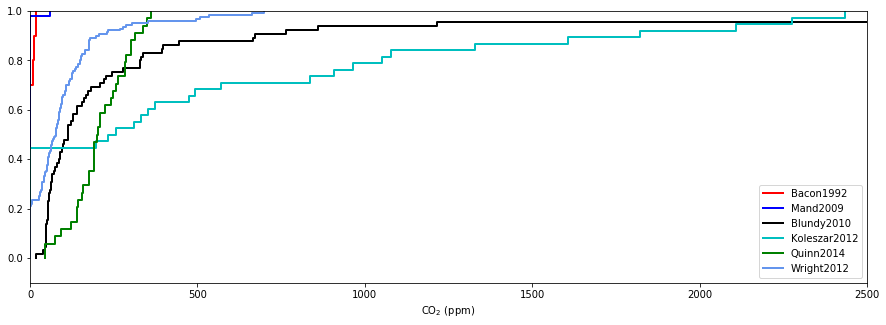

In [7]:
fig, (ax1) = plt.subplots(1,1, figsize=(15,5), sharey=True, sharex=True) # adjust dimensions of figure here
b=2
Bacon1992=np.sort(dfm.loc[dfm.reference=="Bacon_1992", 'co2_glass_raw_ppm'])
Mand2009=np.sort(dfm.loc[dfm.reference=="Mandeville et al. 2009", 'co2_glass_raw_ppm'])
Blundy2010=np.sort(dfm.loc[dfm.reference=="Blundy et al. 2010 EPSL", 'co2_glass_raw_ppm'])
Koleszar2012=np.sort(dfm.loc[dfm.reference=="Koleszar_2012", 'co2_glass_raw_ppm'])
Quinn2014=np.sort(dfm.loc[dfm.reference=="Quinn_2014", 'co2_glass_raw_ppm'])
Wright2012=np.sort(dfm.loc[dfm.reference=="Wright et al. 2012", 'co2_glass_raw_ppm'])
ax1.step(np.concatenate([Bacon1992, Bacon1992[[-1]]]),
         np.arange(Bacon1992.size+1)/Bacon1992.size, color='red', linewidth=b, label="Bacon1992")
ax1.step(np.concatenate([Mand2009, Mand2009[[-1]]]),
         np.arange(Mand2009.size+1)/Mand2009.size, color='blue', linewidth=b, label="Mand2009")
ax1.step(np.concatenate([Blundy2010, Blundy2010[[-1]]]),
         np.arange(Blundy2010.size+1)/Blundy2010.size, color='k', linewidth=b, label="Blundy2010")
ax1.step(np.concatenate([Koleszar2012, Koleszar2012[[-1]]]),
         np.arange(Koleszar2012.size+1)/Koleszar2012.size, color='c', linewidth=b, label="Koleszar2012")
ax1.step(np.concatenate([Quinn2014, Quinn2014[[-1]]]),
         np.arange(Quinn2014.size+1)/Quinn2014.size, color='green', linewidth=b, label="Quinn2014")
ax1.step(np.concatenate([Wright2012, Wright2012[[-1]]]),
         np.arange(Wright2012.size+1)/Wright2012.size, color='cornflowerblue', linewidth=b, label="Wright2012")
ax1.set_xlim([0, 2500])
ax1.set_ylim([-0.1, 1])
ax1.legend()
ax1.set_xlabel('CO$_2$ (ppm)')

## Effect of CO$_2$ on saturation pressures
- Plotting saturation pressure against CO2 content. Highest Psats have CO2.

Text(0.5,0,'CO2 content ppm')

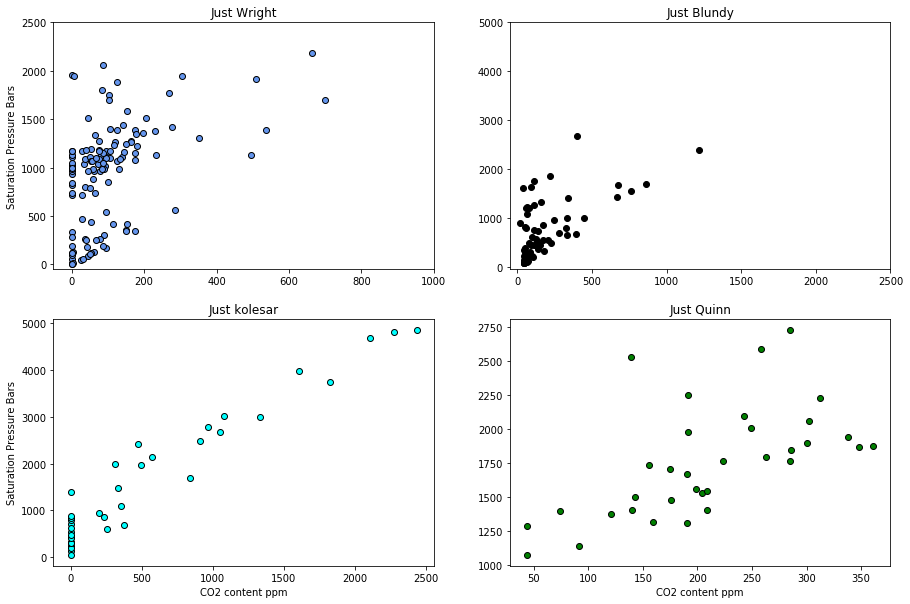

In [8]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(15,10)) # adjust dimensions of figure here
ax1.set_title('Just Wright')
ax1.set_xlim([-50, 1000])
ax1.set_ylim([-50, 2500])
ax1.plot(dfm.loc[dfm.reference=="Wright et al. 2012", 'co2_glass_raw_ppm'], 
        dfm.loc[dfm.reference=="Wright et al. 2012", 'satp_meash2omeasco2'], 'ok', markerfacecolor='cornflowerblue')
ax2.set_title('Just Blundy')
ax2.plot(dfm.loc[dfm.reference=="Blundy et al. 2010 EPSL", 'co2_glass_raw_ppm'], 
        dfm.loc[dfm.reference=="Blundy et al. 2010 EPSL", 'satp_meash2omeasco2'], 'ok', markerfacecolor='k')
ax2.set_xlim([-50, 2500])
ax2.set_ylim([-50, 5000])
ax3.set_title('Just kolesar')
ax3.plot(dfm.loc[dfm.reference=="Koleszar_2012", 'co2_glass_raw_ppm'], 
       dfm.loc[dfm.reference=="Koleszar_2012", 'satp_meash2omeasco2'], 'ok', markerfacecolor='cyan')
ax4.set_title('Just Quinn')
ax4.plot(dfm.loc[dfm.reference=="Quinn_2014", 'co2_glass_raw_ppm'], 
         dfm.loc[dfm.reference=="Quinn_2014", 'satp_meash2omeasco2'], 'ok', markerfacecolor='green')
# ax2.plot(dfm.loc[dfm.reference=="Wright et al. 2012", 'co2_glass_raw_ppm'], 
#         dfm.loc[dfm.reference=="Wright et al. 2012", 'satp_meash2omeasco2'], 'ok', markerfacecolor='cornflowerblue')


ax3.set_xlabel('CO2 content ppm')
ax1.set_ylabel('Saturation Pressure Bars')
ax3.set_ylabel('Saturation Pressure Bars')
ax4.set_xlabel('CO2 content ppm')

# Sensitivity of Saturation P to CO2 contents
- Consider histograms of H2O for Blundy and Koleszar, both of which have CO2 up near 1000 ppm (excluding the higher points of Koleszar)
- 2, 4 and 6 wt% H2O are reasonable test cases to move forward assessing the importance of CO2

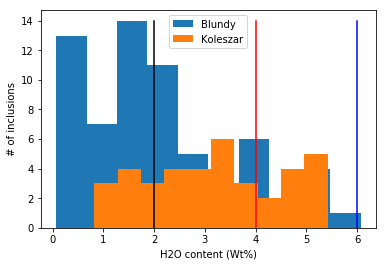

In [9]:
plt.hist(dfm.loc[dfm.reference=="Blundy et al. 2010 EPSL", "h2o_raw_wt"], label='Blundy')
plt.hist(dfm.loc[dfm.reference=="Koleszar_2012", "h2o_raw_wt"], label='Koleszar')
plt.plot([2, 2], [0, 14], '-k')
plt.plot([4, 4], [0, 14], '-r')
plt.plot([6, 6], [0, 14], '-b')
plt.xlabel('H2O content (Wt%)')
plt.ylabel('# of inclusions')
plt.legend()

### Effect of 0-1000 ppm CO$_2$ on saturation pressure
- The plot below shows the change in saturation pressure for one of the blundy dacite compositions with increasing CO$_2$ between 0 and 1000 ppm (LHS). The RHS shows the saturation pressure for each CO2 content at each point along the line divided by the saturation pressure at CO2=0 ppm. Effectively, the factor by which H$_2$O-only estimates (plag hygrometers etc.) would underestimate saturation pressure. Colors correspond to H2O contents on histogram above
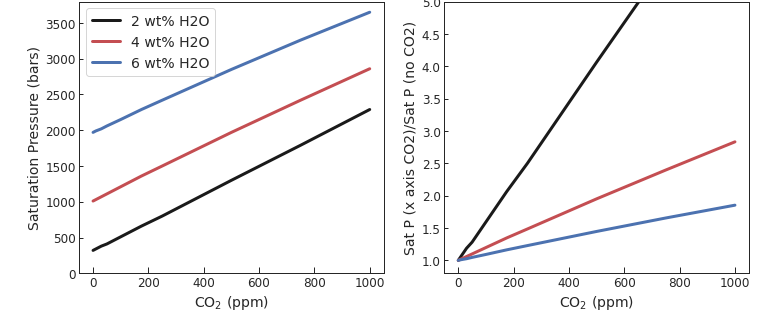

- Another way we can show this is to plot the saturation pressure calculated for X ppm CO2 divided by that for 0 ppm CO2 against the H2O cnotent. Effectively, this tells us the magnitude of the discrepency for storage depths calculated using just H2O as a function of H2O content. 
- I have highlighted with the black dashed line where the discrepency is a factor of 2 - e.g., H2O-only estimates from say Plag hygrometry will underestimate saturation pressures by a factor of 2. For 300 ppm CO2 this is achieved for  MIs with <3 wt% H2O, and for 1000 ppm CO2, for MIs with <6 wt% H2O. 
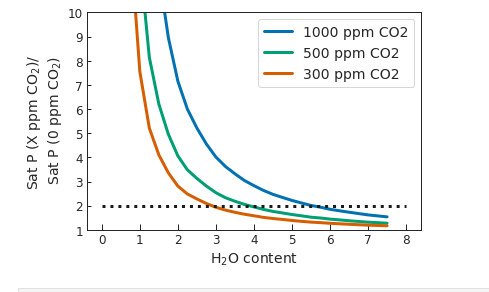

# Finally, for the blundy dataset, I have plotted below histograms for saturation pressures using CO2, and setting CO2=0 ppm. 
#Tomorow, I will calculate the pressures using plag hygrometers (as most are plag-hosted MIs, to see what that looks like)

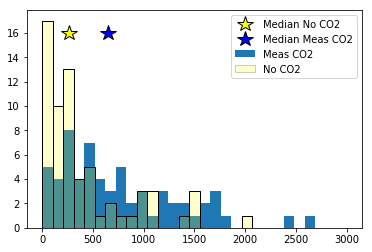

In [10]:
bins_list = np.linspace(0, 3000, 30)
plt.hist(dfm.loc[dfm.reference=="Blundy et al. 2010 EPSL", 'satp_meash2omeasco2'], bins = bins_list, label='Meas CO2')
plt.hist(dfm.loc[dfm.reference=="Blundy et al. 2010 EPSL", 'satp_meash2onoco2'], bins = bins_list, facecolor='yellow', alpha=0.2, edgecolor='k', label='No CO2')
plt.hist(dfm.loc[dfm.reference=="Blundy et al. 2010 EPSL", 'satp_meash2onoco2'], bins = bins_list, facecolor='none', edgecolor='k')
plt.plot(np.median(dfm.loc[dfm.reference=="Blundy et al. 2010 EPSL", 'satp_meash2onoco2']), 16, '*k', markerfacecolor='yellow',label='Median No CO2', markersize=16)
plt.plot(np.median(dfm.loc[dfm.reference=="Blundy et al. 2010 EPSL", 'satp_meash2omeasco2']), 16, '*k', markerfacecolor='blue',label='Median Meas CO2', markersize=16)

plt.legend()

## These diagrams show the mole fraction of H$_2$O in the gas phase at the saturation pressure. The fact a  lot of numbers are <<1, particularly for basalts, is why I was so concerned about P=PH2O assumptions


(0, 5000)

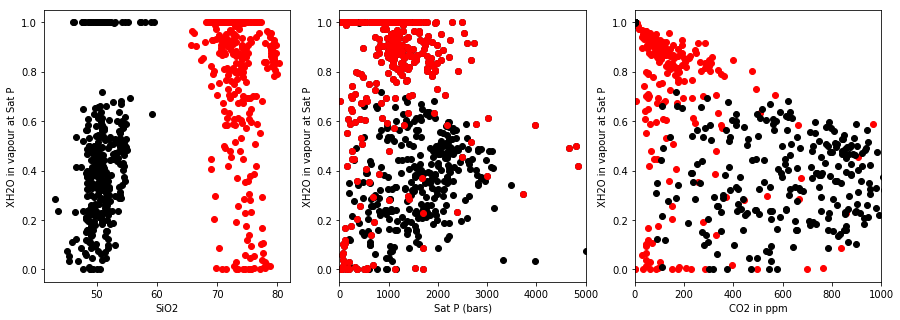

In [11]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5)) # adjust dimensions of figure here

ax1.plot(dfm.loc[~(dfm.sio2_pec_wt>0), 'sio2_raw_wt'], dfm.loc[~(dfm.sio2_pec_wt>0), 'xh2o_fl_meash2omeasco2'], 'or')
ax1.plot(dfm.sio2_pec_wt, dfm.xh2o_fl_meash2omeasco2, 'ok')
ax1.set_xlabel('SiO2')
ax1.set_ylabel('XH2O in vapour at Sat P')

ax2.plot(dfm.satp_meash2omeasco2, dfm.xh2o_fl_meash2omeasco2, 'ok')
ax2.plot(dfm.loc[~(dfm.sio2_pec_wt>0), 'satp_meash2omeasco2'], dfm.loc[~(dfm.sio2_pec_wt>0), 'xh2o_fl_meash2omeasco2'], 'or')

ax3.plot(dfm.loc[~(dfm.sio2_pec_wt>0), 'co2_glass_raw_ppm'], dfm.loc[~(dfm.sio2_pec_wt>0), 'xh2o_fl_meash2omeasco2'], 'or')
ax3.plot(dfm.co2_glass_pec_ppm, dfm.xh2o_fl_meash2omeasco2, 'ok')
ax3.set_xlabel('CO2 ppm')
ax3.set_ylabel('XH2O in vapour at Sat P')
ax3.set_xlim([0, 1000])

ax2.set_xlabel('Sat P (bars)')
ax2.set_ylabel('XH2O in vapour at Sat P')
ax3.set_xlabel('CO2 in ppm')
ax2.set_xlim([0, 5000])